# Introduction to Text generation

This notebook explains how we can split a given corpus of data into features and labels and then train a neural network to predict the next word in a sentence.

1. Create a corpus - break the text down to list of sentences.
2. Create a word_index(vocabulary) from the text.
3. Tokenize the data and create n-gram sequence for each sequence of the corpus.
4. Pad those sequences.
5. Segregate features from the sequences by reserving the last element of the array as labels.


In [65]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.13.1


#### Step 1: Create a corpus

In [67]:
data = "October arrived, spreading a damp chill over the grounds and into the castle.\n Madam Pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.\n Her Pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. Ginny Weasley, who had been looking pale, was bullied into taking some by Percy.\n The steam pouring from under her vivid hair gave the impression that her whole head was on fire.\n Raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and Hagrid's pumpkins swelled to the size of garden sheds.\n Oliver Wood's enthusiasm for regular training sessions, however, was not dampened, which was why Harry was to be found, late one stormy Saturday afternoon a few days before Halloween, returning to Gryffindor Tower, drenched to the skin and splattered with mud."


In [69]:
##instantiate tokenizer
tokenizer = Tokenizer()

##create corpus by lowering the letters and splitting the text by \n
corpus = data.lower().split("\n")
print(corpus)

['october arrived, spreading a damp chill over the grounds and into the castle.', ' madam pomfrey, the nurse, was kept busy by a sudden spate of colds among the staff and students.', ' her pepperup potion worked instantly, though it left the drinker smoking at the ears for several hours afterward. ginny weasley, who had been looking pale, was bullied into taking some by percy.', ' the steam pouring from under her vivid hair gave the impression that her whole head was on fire.', " raindrops the size of bullets thundered on the castle windows for days on end; the lake rose, the flower beds turned into muddy streams, and hagrid's pumpkins swelled to the size of garden sheds.", " oliver wood's enthusiasm for regular training sessions, however, was not dampened, which was why harry was to be found, late one stormy saturday afternoon a few days before halloween, returning to gryffindor tower, drenched to the skin and splattered with mud."]


#### Step 2: Train the tokenizer and create word encoding dictionary

In [71]:
tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - +1 for  token
vocab_size = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(vocab_size)

{'the': 1, 'was': 2, 'and': 3, 'to': 4, 'a': 5, 'into': 6, 'of': 7, 'her': 8, 'for': 9, 'on': 10, 'castle': 11, 'by': 12, 'size': 13, 'days': 14, 'october': 15, 'arrived': 16, 'spreading': 17, 'damp': 18, 'chill': 19, 'over': 20, 'grounds': 21, 'madam': 22, 'pomfrey': 23, 'nurse': 24, 'kept': 25, 'busy': 26, 'sudden': 27, 'spate': 28, 'colds': 29, 'among': 30, 'staff': 31, 'students': 32, 'pepperup': 33, 'potion': 34, 'worked': 35, 'instantly': 36, 'though': 37, 'it': 38, 'left': 39, 'drinker': 40, 'smoking': 41, 'at': 42, 'ears': 43, 'several': 44, 'hours': 45, 'afterward': 46, 'ginny': 47, 'weasley': 48, 'who': 49, 'had': 50, 'been': 51, 'looking': 52, 'pale': 53, 'bullied': 54, 'taking': 55, 'some': 56, 'percy': 57, 'steam': 58, 'pouring': 59, 'from': 60, 'under': 61, 'vivid': 62, 'hair': 63, 'gave': 64, 'impression': 65, 'that': 66, 'whole': 67, 'head': 68, 'fire': 69, 'raindrops': 70, 'bullets': 71, 'thundered': 72, 'windows': 73, 'end': 74, 'lake': 75, 'rose': 76, 'flower': 77, '

#### Step 3: Create N-gram sequence

<center>
    <img src="images/ngram.png" width="500" />
</center>

In [73]:
##create n-gram sequences of each text sequence
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]  # get all the tokens of the sequence
    for i in range(1, len(tokens)):                   # create n-gram sequences
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)


#### Step 4: Pad those sequence

In [75]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )

#### Step 5: Segregate features

<center>
    <img src="images/extra.png" width="800" />
</center>

In [77]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [83]:
print(tokenizer.word_index['mud'])
print()
print(X[0])
print()
print(y[0])

116

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 15]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Define the LSTM model

In [ ]:
# Initialize a Sequential model
model = tf.keras.Sequential([  # Initialize a Sequential model

    tf.keras.layers.Embedding(vocab_size, 
                              64, 
                              input_length=max_seq_len-1),  

    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),  # Bidirectional LSTM layer with 32 units: processes sequences in both directions (forward and backward)

    tf.keras.layers.Dense(vocab_size, activation='softmax')  # Dense layer: fully connected with softmax activation for multi-class classification
])

model.compile(  # Compile the model with loss, optimizer, and evaluation metric
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    optimizer='adam',  # Adaptive Moment Estimation optimizer
    metrics=['accuracy']  # Evaluate model performance using accuracy
)

history = model.fit(  # Train the model with input data X and target labels y
    X,  # Input sequences
    y,  # Target labels
    epochs=500,  # Train for 500 epochs
    verbose=1  # Print progress during training
)


#### Visualize metrics

In [ ]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

In [ ]:
plot_metric(history, 'accuracy')

#### Generate new text

In [ ]:
seed_text = "It was a cold night."

##add number of words you want to predict
next_words = 100
  
##run the loop to predict and concatenate the word
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
 
    ##predict the class using the trained model
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
        ##reference the predicted class with the vocabulary
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

# Generate Poetry

This notebook serves as a challenge on how to create poetry like Shakespeare by leveraging RNNs(LSTMs). We'll be using the Shakerpeare poetry as the training data and then use the trained network to predict the next words.

In [26]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.13.1


#### Step 1: Create a corpus

In [13]:
##printing the text
shakespeare_text = open('data/sonnets.txt').read()
print(len(shakespeare_text))

28893


In [19]:
##create corpus by lowering the letters and splitting the text by \n
corpus = shakespeare_text.lower().split("\n")
corpus[:10]

['i',
 '',
 ' from fairest creatures we desire increase,',
 " that thereby beauty's rose might never die,",
 ' but as the riper should by time decease,',
 ' his tender heir might bear his memory:',
 ' but thou, contracted to thine own bright eyes,',
 " feed'st thy light's flame with self-substantial fuel,",
 ' making a famine where abundance lies,',
 ' thy self thy foe, to thy sweet self too cruel:']

In [22]:
#print(corpus)

#### Step 2: Train the tokenizer and create word encoding dictionary

In [36]:
##set up tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(corpus)

##calculate vocabulary size - be mindful of the  token
vocab_size = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)

print(vocab_size)

1544


#### Step 3: Create N-gram sequence

In [40]:
##create sequences of 
input_sequences = []
for line in corpus:
    tokens = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1]
        input_sequences.append(n_gram_sequence)

#### Step 4: Pad those sequence

In [43]:
##pad sequences
max_seq_len = max([len(i) for i in input_sequences])
input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre')
                        )

#### Step 5: Segregate features¶

In [46]:
##creating features(X) and label(y)
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

##one-hot encode the labels to get y - since it is actually just a classification problem
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

### Define the LSTM model

In [51]:
# Create a Sequential model
model = tf.keras.Sequential([ 
    
    # Embedding layer: Converts input sequences into dense vectors of fixed size
    tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1),  # vocab_size: size of the vocabulary; 
                                                                             # 120: dimensionality of the output space; 
                                                                             # max_seq_len-1: length of input sequences
    
    # Bidirectional LSTM layer: Processes the input sequences in both forward and backward directions to capture context from both sides
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),  # 120: number of output units for the LSTM layer

    # Dense layer: Output layer that produces a probability distribution over the vocabulary (softmax activation function)
    tf.keras.layers.Dense(vocab_size, activation='softmax')  # vocab_size: number of output neurons equal to the size of the vocabulary; 
                                                             # 'softmax': activation function for multi-class classification
])

# Define the learning rate - step size for the optimizer
adam = tf.keras.optimizers.Adam(learning_rate=0.01)  # Adam optimizer with a learning rate of 0.01

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy',  # Loss function for multi-class classification
              optimizer=adam,                   # Optimizer to use for updating the model weights
              metrics=['accuracy'])             # Metric to evaluate the model's performance

# Train the model
history = model.fit(X, y,        # X: input data; y: target data
                    epochs=200,  # Number of epochs (iterations over the entire dataset)
                    verbose=1)   # Verbosity mode; 1 displays progress bar

Epoch 1/200
142/142 [==============================] - 24s 36ms/step - loss: 6.7245 - accuracy: 0.0214
Epoch 2/200
142/142 [==============================] - 5s 37ms/step - loss: 6.0806 - accuracy: 0.0391
Epoch 3/200
142/142 [==============================] - 5s 35ms/step - loss: 5.5044 - accuracy: 0.0650
Epoch 4/200
142/142 [==============================] - 5s 37ms/step - loss: 4.6038 - accuracy: 0.1200
Epoch 5/200
142/142 [==============================] - 5s 36ms/step - loss: 3.4689 - accuracy: 0.2519
Epoch 6/200
142/142 [==============================] - 5s 36ms/step - loss: 2.3982 - accuracy: 0.4496
Epoch 7/200
142/142 [==============================] - 5s 35ms/step - loss: 1.6031 - accuracy: 0.6200
Epoch 8/200
142/142 [==============================] - 5s 36ms/step - loss: 1.0672 - accuracy: 0.7572
Epoch 9/200
142/142 [==============================] - 5s 35ms/step - loss: 0.7520 - accuracy: 0.8274
Epoch 10/200
142/142 [==============================] - 5s 36ms/step - loss: 0.59

### Visualise the metrics

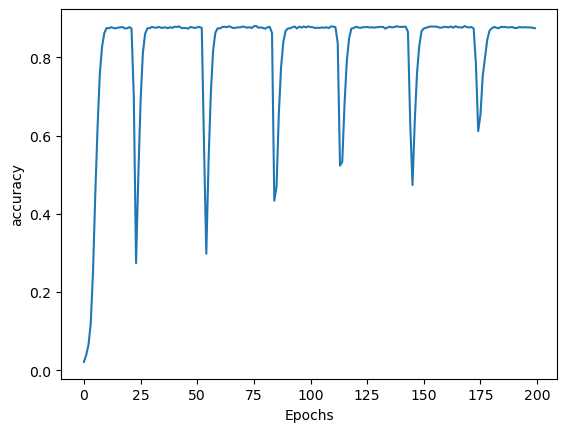

In [52]:
import matplotlib.pyplot as plt


def plot_metric(history, metric):
  plt.plot(history.history[metric])
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.show()

plot_metric(history, 'accuracy')

### Generate new text

In [56]:
seed_text = "It was a cold night."  # Starting text for generating new words
next_words = 100                    # Number of words to generate

# Loop to generate the next 'next_words' words
for _ in range(next_words):
    
    # Convert the seed text to a sequence of integers based on the tokenizer's vocabulary
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    
    # Pad the sequence to ensure it matches the input length required by the model
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    
    # Predict the probability distribution of the next word using the model
    predicted_probs = model.predict(token_list, verbose=0)  # Use predict() to get probabilities
    
    # Get the index of the word with the highest predicted probability
    predicted = np.argmax(predicted_probs, axis=-1)  # Find the index of the max probability
    
    output_word = ""  # Initialize an empty string to store the predicted word
    
    # Loop through the tokenizer's word index to find the word corresponding to the predicted index
    for word, index in tokenizer.word_index.items():
        
        if index == predicted:  # Check if the index matches the predicted index
            output_word = word  # If it matches, set the output word
            break               # Exit the loop as we found the word
    
    # Append the predicted word to the seed text to form a new input for the next prediction
    seed_text += " " + output_word

print(seed_text)  # Print the generated text

It was a cold night. doth see away fair me thee i make have make darkness imaginary since height deeds of say dost things give the art painted part of me me thee me be make wanting love's heaven thee toward thee themselves me true in viewest live are war thee my heart remain me me i love and say mine thee all all that metre of mine through did fair cover me be borne alone true for remember'd me thee heaven not made praise do heart ' in summer's use when thou it no remain remain it and in thee love and numbers where
